In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# Download TLT (Long-term Treasury Bond ETF) data
tlt = yf.download("TLT", start="2002-01-01", end="2024-06-30")
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

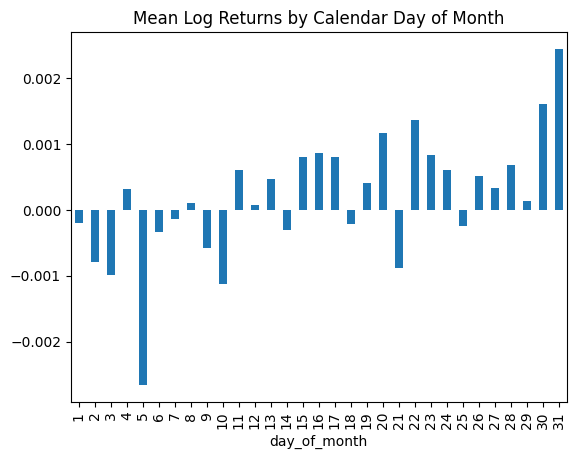

In [2]:
tlt["day_of_month"] = tlt.index.day
tlt["year"] = tlt.index.year
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

In [3]:
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[tlt.day_of_month <= 7].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[tlt.day_of_month >= 23].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

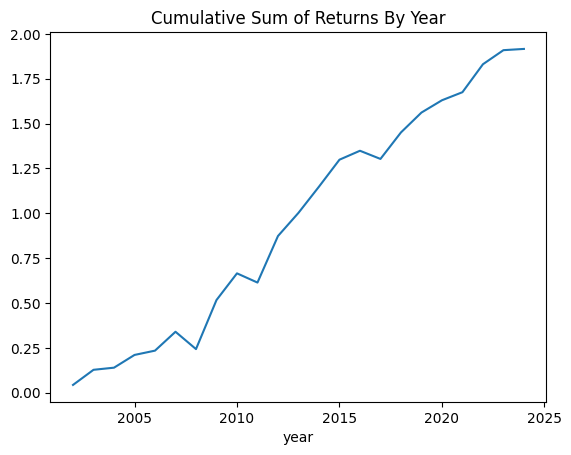

In [4]:
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

In [5]:
# List of ETFs to test
etfs = [
    "TLT",  # Long-term Treasury bonds
    "IEF",  # Intermediate Treasury bonds
    "SHY",  # Short-term Treasury bonds
    "LQD",  # Corporate bonds
    "HYG",  # High-yield bonds
    "AGG",  # Aggregate bonds
    "GLD",  # Gold
    "SPY",  # S&P 500
    "QQQ",  # Nasdaq 100
    "IWM"   # Russell 2000
]

# Function to calculate strategy returns for an ETF
def calculate_strategy_returns(ticker):
    try:
        # Download data
        df = yf.download(ticker, start="2002-01-01", end="2024-06-30")

        # Calculate log returns
        df["log_return"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))

        # Add calendar features
        df["day_of_month"] = df.index.day

        # Calculate strategy returns
        df["first_week_returns"] = 0.0
        df.loc[df.day_of_month <= 7, "first_week_returns"] = df[df.day_of_month <= 7].log_return

        df["last_week_returns"] = 0.0
        df.loc[df.day_of_month >= 23, "last_week_returns"] = df[df.day_of_month >= 23].log_return

        # Calculate strategy metrics
        total_return = (df.last_week_returns - df.first_week_returns).sum()
        annual_return = total_return / (len(df) / 252)  # Annualized
        sharpe = np.sqrt(252) * (df.last_week_returns - df.first_week_returns).mean() / (df.last_week_returns - df.first_week_returns).std()

        return {
            "ticker": ticker,
            "total_return": total_return,
            "annual_return": annual_return,
            "sharpe": sharpe
        }
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

# Run analysis for all ETFs
results = []
for etf in etfs:
    result = calculate_strategy_returns(etf)
    if result:
        results.append(result)

# Create results DataFrame and sort by Sharpe ratio
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("sharpe", ascending=False)

# Format results for display
results_df["total_return"] = results_df["total_return"].map("{:.2%}".format)
results_df["annual_return"] = results_df["annual_return"].map("{:.2%}".format)
results_df["sharpe"] = results_df["sharpe"].map("{:.2f}".format)

# Display results
print("\nStrategy Performance Across ETFs:")
print(results_df.to_string(index=False))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Strategy Performance Across ETFs:
ticker total_return annual_return sharpe
   AGG       64.42%         3.11%   0.91
   TLT      191.64%         8.75%   0.85
   SHY       19.46%         0.89%   0.85
   IEF       86.61%         3.96%   0.81
   LQD       97.65%         4.46%   0.75
   HYG       36.24%         2.11%   0.28
   IWM       90.83%         4.04%   0.24
   QQQ       27.31%         1.22%   0.08
   SPY        6.89%         0.31%   0.02
   GLD      -14.66%        -0.75%  -0.06
